In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

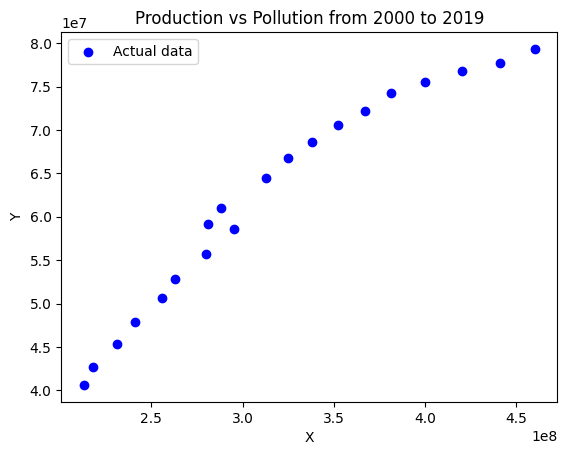

In [4]:
#accessing x and y data for production vs pollution
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-pollution.csv', delimiter=',', skip_header=1)
pollution_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-fate.csv', delimiter=',', skip_header=1)
pollution_y = ydata[:, 1]

plt.scatter(pollution_x, pollution_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Pollution from 2000 to 2019')
plt.legend()
plt.show()

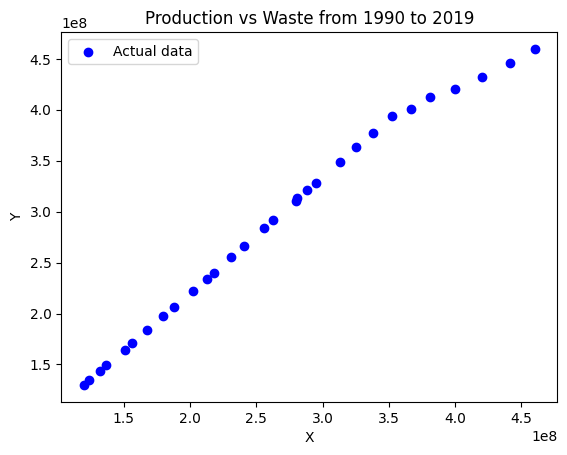

In [5]:
#accessing x and y data for production vs waste
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-waste.csv', delimiter=',', skip_header=1)
waste_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-waste-by-sector.csv', delimiter=',', skip_header=1)
waste_y = ydata[:, 1]


plt.scatter(waste_x, waste_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Waste from 1990 to 2019')
plt.legend()
plt.show()

In [6]:
# calculating the residual sum of squares
def calcRSS(y, y_pred):
    sqr_error = np.power(y - y_pred, 2)
    RSS = np.sum(sqr_error)
    return RSS

# calculting Akaike Information Criteria
def calcAIC(RSS, n, k):
    AIC = n*np.log(RSS/n)+2*(k+1)
    return AIC

DEGREE: 1 COEFFICIENTS: [1.61190008e-01 1.07610688e+07] 
 RSS: 173433507040329.53 
 AIC: 601.8216624716024
DEGREE: 2 COEFFICIENTS: [-5.51614738e-10  5.27173304e-01 -4.69173289e+07] 
 RSS: 17500665500582.035 
 AIC: 557.9505550237129
DEGREE: 3 COEFFICIENTS: [-3.72902275e-19 -1.79384138e-10  4.07169187e-01 -3.44391992e+07] 
 RSS: 17188502428917.918 
 AIC: 559.5905907847532
DEGREE: 4 COEFFICIENTS: [ 1.74537092e-26 -2.36935006e-17  1.12486609e-08 -2.02429081e+00
  1.54937294e+08] 
 RSS: 14662843388973.533 
 AIC: 558.4121095123551
DEGREE: 5 COEFFICIENTS: [ 1.25136982e-35 -3.53637253e-27 -9.84084853e-18  6.75566136e-09
 -1.30853273e+00  1.10152984e+08] 
 RSS: 14657608191772.209 
 AIC: 560.4049674705724



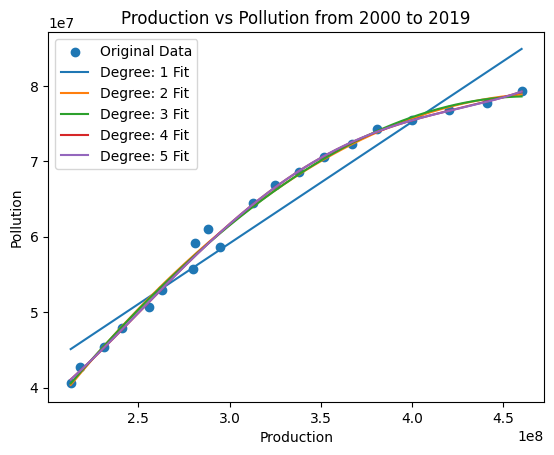

Picked Pollution Prediction Model of Degree 2
[-5.51614738e-10  5.27173304e-01 -4.69173289e+07]
Prediction: 61589335.830526546

DEGREE: 1 COEFFICIENTS: [1.02665728e+00 1.56393233e+07] 
 RSS: 3229366945361709.0 
 AIC: 975.2959541737814
DEGREE: 2 COEFFICIENTS: [-9.66922843e-10  1.56510791e+00 -4.98100327e+07] 
 RSS: 749967249216751.9 
 AIC: 933.4955981639687
DEGREE: 3 COEFFICIENTS: [-5.34536046e-18  3.59214491e-09  3.71165801e-01  4.43447676e+07] 
 RSS: 177792342260108.2 
 AIC: 892.313199610464
DEGREE: 4 COEFFICIENTS: [ 4.09978451e-27 -1.00413412e-17  5.49977360e-09  4.83217398e-02
  6.33735253e+07] 
 RSS: 175193729499544.25 
 AIC: 893.8714836480142
DEGREE: 5 COEFFICIENTS: [ 3.11597169e-34 -4.43446074e-25  2.36355251e-16 -5.91584502e-08
  8.09449714e+00 -3.14929503e+08] 
 RSS: 68177658590676.01 
 AIC: 867.5582197640181



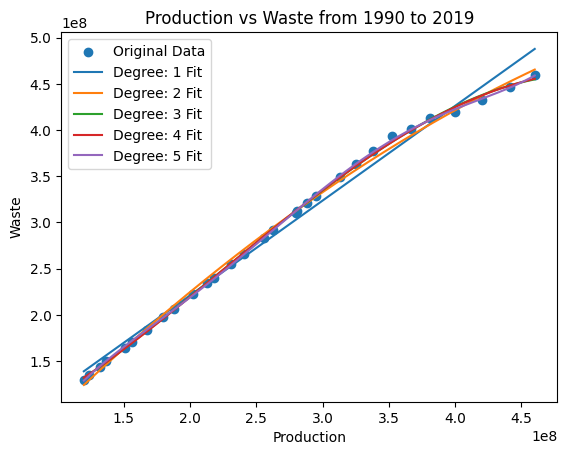

Picked Waste Prediction Model of Degree 5
[ 3.11597169e-34 -4.43446074e-25  2.36355251e-16 -5.91584502e-08
  8.09449714e+00 -3.14929503e+08]
Prediction: -312506471.497553



In [7]:

# pick the model with the best degree that maps to the data
def pick_best_model(AICvals):
    if len(AICvals) == 0: return None
    best = 0
    # picks model that follows AICnew-AICprev >= 2
    for i in range(len(AICvals)):
        if AICvals[i] <= AICvals[best]-2:
            best = i
    return best+1

# Using Linear Least Squares to determine the coefficients of the model
def linear_fit2(x, y):
    xT = np.transpose(x)
    xTx = np.dot(xT, x)
    xTy = np.dot(xT, y)
    xTx_inv = np.linalg.inv(xTx)
    c = np.dot(xTx_inv, xTy)
    return c

# Doing a polynomial fit on the data
def poly_fit(x, y, num_degrees, AICvals):
    results = []

    for i in range(1, num_degrees+1):
        xdata = np.linspace(min(x), max(x), 500)
        new_x = np.vander(x, i+1)
        coefficients = linear_fit2(new_x, y)
        final_y = np.polyval(coefficients, xdata)

        #calculate RSS
        RSS = calcRSS(y, np.polyval(coefficients, x))

        #calcualte AIC
        AIC = calcAIC(RSS, len(x), len(coefficients))
        AICvals.append(AIC)

        results.append((i, coefficients, RSS, AIC, xdata, final_y))

    return results

plt.scatter(pollution_x, pollution_y, label="Original Data")
degrees = 5
AICvals_pollution = []
results = poly_fit(pollution_x, pollution_y, degrees, AICvals_pollution) #calculating polynomials starting at 1 degree to 5 degrees
pollution_stored_coefficients = []
for i in range(0, degrees):
    i, coefficients, RSS, AIC, xdata, final_y = results[i]
    pollution_stored_coefficients.append(coefficients)
    print(f"DEGREE: {i} COEFFICIENTS: {coefficients} \n RSS: {RSS} \n AIC: {AIC}")
    plt.plot(xdata, final_y, label = f"Degree: {i} Fit") 

print("")
plt.title(f"Production vs Pollution from 2000 to 2019")
plt.xlabel("Production")
plt.ylabel("Pollution")
plt.legend() 
plt.show()

pollution_model_number = pick_best_model(AICvals_pollution)
print(f"Picked Pollution Prediction Model of Degree {pollution_model_number}")
print(pollution_stored_coefficients[pollution_model_number-1])
pollution_prediction_result = np.polyval(pollution_stored_coefficients[pollution_model_number-1], int(input("Input the production amount in Tonnes")))
print(f"Prediction: {pollution_prediction_result}\n")


plt.scatter(waste_x, waste_y, label="Original Data")
degrees = 5
AICvals_waste = []
results = poly_fit(waste_x, waste_y, degrees, AICvals_waste) #calculating polynomials starting at 1 degree to 5 degrees
waste_stored_coefficients = []
for i in range(0, degrees):
    i, coefficients, RSS, AIC, xdata, final_y = results[i]
    waste_stored_coefficients.append(coefficients)
    print(f"DEGREE: {i} COEFFICIENTS: {coefficients} \n RSS: {RSS} \n AIC: {AIC}")
    plt.plot(xdata, final_y, label = f"Degree: {i} Fit") 

print("")
plt.title(f"Production vs Waste from 1990 to 2019")
plt.xlabel("Production")
plt.ylabel("Waste")
plt.legend() 
plt.show()

waste_model_number = pick_best_model(AICvals_waste)
print(f"Picked Waste Prediction Model of Degree {waste_model_number}")
print(waste_stored_coefficients[waste_model_number-1])
waste_prediction_result = np.polyval(waste_stored_coefficients[waste_model_number-1], int(input("Input the production amount in Tonnes")))
print(f"Prediction: {waste_prediction_result}\n")

Linear Regression Pollution Prediction SLOPE: 0.16119000813685033 
 INTERCEPT: 10761068.761261068 
 RSS: 173433507040329.47 
 AIC: 599.8216624716024
Pollution Prediction for Input: [59118071.20231616]


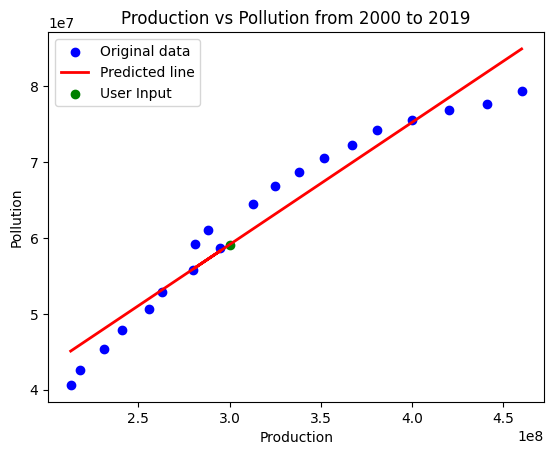

Linear Regression Waste Prediction SLOPE: 1.0266572768325408 
 INTERCEPT: 15639323.338714778 
 RSS: 3229366945361704.0 
 AIC: 973.2959541737814
Waste Prediction for Input: [3.23636506e+08]


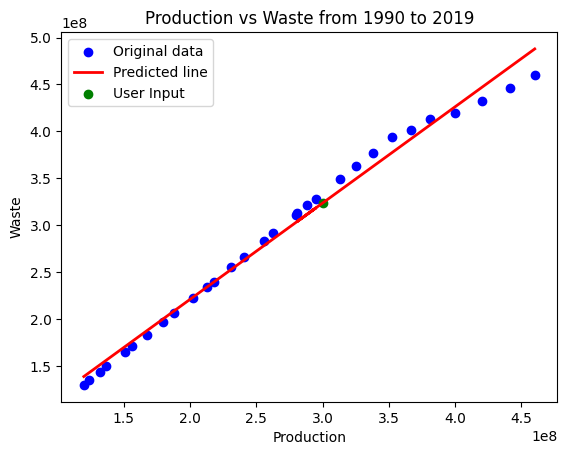

In [10]:
# Doing Linear Regression on Production vs Pollution and Production vs Waste
pollution_x = pollution_x.reshape(-1, 1)
waste_x = waste_x.reshape(-1, 1)

# Training Pollution Model
predict_pollution_model = LinearRegression()
predict_pollution_model.fit(pollution_x, pollution_y)

# Training Waste Model
predict_waste_model = LinearRegression()
predict_waste_model.fit(waste_x, waste_y)

# Predicting using Pollution Model
pollution_prediction = predict_pollution_model.predict(pollution_x)
user_production_pollution = np.array([[float(input("Input the production amount in Tonnes (Predict Waste)"))]])
single_pollution_prediction = predict_pollution_model.predict(user_production_pollution)

RSS_pollution = calcRSS(pollution_y, pollution_prediction)
AIC_pollution = calcAIC(RSS_pollution, len(pollution_y), pollution_x.shape[1])

print(f"Linear Regression Pollution Prediction SLOPE: {predict_pollution_model.coef_[0]} \n INTERCEPT: {predict_pollution_model.intercept_} \n RSS: {RSS_pollution} \n AIC: {AIC_pollution}")

print(f"Pollution Prediction for Input: {single_pollution_prediction}")

plt.scatter(pollution_x, pollution_y, color='blue', label='Original data')
plt.plot(pollution_x, pollution_prediction, color='red', linewidth=2, label='Predicted line')
plt.scatter(user_production_pollution, single_pollution_prediction, color = 'green', label='User Input')
plt.title(f"Production vs Pollution from 2000 to 2019")
plt.xlabel("Production")
plt.ylabel("Pollution")
plt.legend() 
plt.show()

# Predicting using Waste Model
waste_prediction = predict_waste_model.predict(waste_x)
user_production_waste = np.array([[float(input("Input the production amount in Tonnes (Predict Waste)"))]])
single_waste_prediction = predict_waste_model.predict(user_production_waste)

RSS_waste = calcRSS(waste_y, waste_prediction)
AIC_waste = calcAIC(RSS_waste, len(waste_y), waste_x.shape[1])

print(f"Linear Regression Waste Prediction SLOPE: {predict_waste_model.coef_[0]} \n INTERCEPT: {predict_waste_model.intercept_} \n RSS: {RSS_waste} \n AIC: {AIC_waste}")

print(f"Waste Prediction for Input: {single_waste_prediction}")

plt.scatter(waste_x, waste_y, color='blue', label='Original data')
plt.plot(waste_x, waste_prediction, color='red', linewidth=2, label='Predicted line')
plt.scatter(user_production_waste, single_waste_prediction, color = 'green', label='User Input')
plt.title(f"Production vs Waste from 1990 to 2019")
plt.xlabel("Production")
plt.ylabel("Waste")
plt.legend() 
plt.show()
